<a href="https://colab.research.google.com/github/Dogdriip/dg-univ-2020-ml/blob/main/v1_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v1.2.5

- PyCaret 써보고 끝낸다

In [113]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [114]:
!pip install pycaret  # AutoML

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

!pip install missingpy
from missingpy import MissForest

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from pycaret.regression import *

In [115]:
train = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/train.csv')
test = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/test.csv')

In [116]:
print(train.shape)
print(test.shape)

(11769, 15)
(5789, 13)


In [117]:
train.head()

,no,모델명,연월,연식,연료,주행거리,인승,최대출력(마력),기통,최대토크(kgm),구동방식,자동수동,국산/수입,신차가(만원),가격(만원)
0,0,기아 더 뉴 K7 2.4 GDI 프레스티지 스페셜,12/12(13년형),2013.0,가솔린,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0
1,1,현대 YF쏘나타 2.0 Y20 LPi 프리미어,10/03,2010.0,LPG,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0
2,2,현대 그랜져HG 220 디젤 프리미엄,14/09(15년형),2015.0,디젤,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0
3,3,쌍용 뉴카이런 2.0 LV5 2WD 고급형,07/06(08년형),2008.0,디젤,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0
4,4,현대 뉴스타렉스 점보 밴 TCI 3인승 GX 윈도우밴 일반형,04/03,2004.0,디젤,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   모델명        11769 non-null  object 
 2   연월         11769 non-null  object 
 3   연식         11769 non-null  float64
 4   연료         11769 non-null  object 
 5   주행거리       11769 non-null  object 
 6   인승         765 non-null    float64
 7   최대출력(마력)   10644 non-null  float64
 8   기통         8698 non-null   float64
 9   최대토크(kgm)  10545 non-null  float64
 10  구동방식       10808 non-null  object 
 11  자동수동       1313 non-null   object 
 12  국산/수입      11769 non-null  object 
 13  신차가(만원)    9544 non-null   float64
 14  가격(만원)     11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   모델명        5789 non-null   object 
 2   연월         5789 non-null   object 
 3   연식         5789 non-null   float64
 4   연료         5789 non-null   object 
 5   주행거리       5789 non-null   object 
 6   인승         389 non-null    float64
 7   최대출력(마력)   5237 non-null   float64
 8   기통         4275 non-null   float64
 9   최대토크(kgm)  5183 non-null   float64
 10  구동방식       5312 non-null   object 
 11  자동수동       665 non-null    object 
 12  국산/수입      5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


# Translate all column name to English

In [120]:
train.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country', 'newprice', 'price']
test.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country']

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   modelname  11769 non-null  object 
 2   ym         11769 non-null  object 
 3   yeartype   11769 non-null  float64
 4   fuel       11769 non-null  object 
 5   dist       11769 non-null  object 
 6   people     765 non-null    float64
 7   power      10644 non-null  float64
 8   cylinder   8698 non-null   float64
 9   torque     10545 non-null  float64
 10  type       10808 non-null  object 
 11  mission    1313 non-null   object 
 12  country    11769 non-null  object 
 13  newprice   9544 non-null   float64
 14  price      11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   modelname  5789 non-null   object 
 2   ym         5789 non-null   object 
 3   yeartype   5789 non-null   float64
 4   fuel       5789 non-null   object 
 5   dist       5789 non-null   object 
 6   people     389 non-null    float64
 7   power      5237 non-null   float64
 8   cylinder   4275 non-null   float64
 9   torque     5183 non-null   float64
 10  type       5312 non-null   object 
 11  mission    665 non-null    object 
 12  country    5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


# Drop columns

In [123]:
train_no = train['no']
test_no = test['no']

train = train.drop(['no'], axis=1)
test = test.drop(['no'], axis=1)

In [124]:
train = train.drop(['newprice', 'people', 'ym', 'country'], axis=1)
test = test.drop(['people', 'ym', 'country'], axis=1)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   modelname  11769 non-null  object 
 1   yeartype   11769 non-null  float64
 2   fuel       11769 non-null  object 
 3   dist       11769 non-null  object 
 4   power      10644 non-null  float64
 5   cylinder   8698 non-null   float64
 6   torque     10545 non-null  float64
 7   type       10808 non-null  object 
 8   mission    1313 non-null   object 
 9   price      11769 non-null  float64
dtypes: float64(5), object(5)
memory usage: 919.6+ KB


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   modelname  5789 non-null   object 
 1   yeartype   5789 non-null   float64
 2   fuel       5789 non-null   object 
 3   dist       5789 non-null   object 
 4   power      5237 non-null   float64
 5   cylinder   4275 non-null   float64
 6   torque     5183 non-null   float64
 7   type       5312 non-null   object 
 8   mission    665 non-null    object 
dtypes: float64(4), object(5)
memory usage: 407.2+ KB


# Getting started (All columns here)
```
0   no         11769 non-null  int64    
1   모델명        11769 non-null  object   
2   연월         11769 non-null  object   
3   연식         11769 non-null  float64  
4   연료         11769 non-null  object   
5   주행거리       11769 non-null  object   
6   인승         765 non-null    float64  
7   최대출력(마력)   10644 non-null  float64  
8   기통         8698 non-null   float64  
9   최대토크(kgm)  10545 non-null  float64  
10  구동방식       10808 non-null  object   
11  자동수동       1313 non-null   object   
12  국산/수입      11769 non-null  object   
13  신차가(만원)    9544 non-null   float64  
14  가격(만원)     11769 non-null  float64  
```

```
0   no         11769 non-null  int64  
1   modelname  11769 non-null  object 
2   ym         11769 non-null  object 
3   yeartype   11769 non-null  float64
4   fuel       11769 non-null  object 
5   dist       11769 non-null  object 
6   people     765 non-null    float64
7   power      10644 non-null  float64
8   cylinder   8698 non-null   float64
9   torque     10545 non-null  float64
10  type       10808 non-null  object 
11  mission    1313 non-null   object 
12  country    11769 non-null  object 
13  newprice   9544 non-null   float64
14  price      11769 non-null  float64
```

# Outlier check, remove

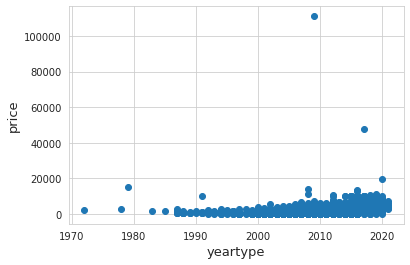

In [127]:
fig, ax = plt.subplots()
ax.scatter(x=train['yeartype'], y=train['price'])
plt.xlabel('yeartype', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

In [128]:
train = train.drop(train[(train['price'] > 40000)].index)

In [129]:
train[(train['price'] > 40000)]

,modelname,yeartype,fuel,dist,power,cylinder,torque,type,mission,price


# 최소한의 전처리

## 5 주행거리 dist 11769 non-null object

In [130]:
def preprocess_dist(x):
    # '등록'은 나중에 평균으로 채울 거임
    if x == '등록':
        return None

    if x[-2:] == 'km':
        # kilometer
        x = x.split('km')[0]
        weight = 1
    else:
        # mile
        assert x[-2:] == 'ml'
        x = x.split('ml')[0]
        weight = 1.609344

    if x[-1] == '만':
        x = float(x.split('만')[0]) * 10000
    elif x[-1] == '천':
        x = float(x.split('천')[0]) * 1000

    return float(x * weight)

In [131]:
train['dist'] = train['dist'].apply(preprocess_dist)
test['dist'] = test['dist'].apply(preprocess_dist)

## 11 자동수동 mission 1313 non-null object

In [132]:
train['mission'] = train['mission'].fillna('자동')
test['mission'] = test['mission'].fillna('자동')

# Model

In [133]:
clf = setup(data=train, 
            target='price', 
            use_gpu=True, 
            numeric_imputation='median', 
            remove_outliers=True,
            transformation=True, transformation_method='yeo-johnson',
            normalize=True, normalize_method='maxabs'
            )

,Description,Value
0,session_id,7993
1,Target,price
2,Original Data,"(11767, 10)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7824, 1915)"


In [134]:
best_3 = compare_models(sort='RMSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,319.5775,3.641854e+05,569.7719,0.7040,0.5747,5.3201,10.597
catboost,CatBoost Regressor,334.3843,3.804068e+05,613.9542,0.7922,0.5222,6.5662,6.941
rf,Random Forest Regressor,318.3636,3.903317e+05,620.9073,0.7869,0.5073,6.6261,12.316
xgboost,Extreme Gradient Boosting,331.4267,3.972484e+05,626.0397,0.7831,0.5161,6.4254,1.699
lightgbm,Light Gradient Boosting Machine,341.7299,4.098799e+05,637.0658,0.7750,0.5175,6.7750,0.332
ridge,Ridge Regression,362.0721,4.100728e+05,637.6183,0.7757,0.6598,6.6523,0.509
knn,K Neighbors Regressor,338.6043,4.148775e+05,639.9016,0.7721,0.5153,6.5885,3.341
et,Extra Trees Regressor,321.4081,4.236058e+05,646.4762,0.7688,0.5581,6.3910,15.997
lar,Least Angle Regression,373.4429,4.440428e+05,663.5977,0.7574,0.6470,6.4710,1.354
gbr,Gradient Boosting Regressor,384.9014,4.445723e+05,664.2766,0.7567,0.5555,6.4937,14.523


In [135]:
blended = blend_models(estimator_list=best_3, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,307.3911,310158.5782,556.9188,0.8228,0.4134,1.5843
1,309.2566,348730.9238,590.5344,0.7947,0.6469,12.6620
2,301.0555,304454.8579,551.7743,0.8255,0.4418,4.5851
3,330.6073,498944.0266,706.3597,0.7308,0.6015,9.5595
4,320.1798,374354.8757,611.8455,0.8207,0.5395,4.4715
Mean,313.6980,367328.6524,603.4865,0.7989,0.5286,6.5725
SD,10.4621,70624.8985,55.9700,0.0358,0.0897,3.9812


In [136]:
pred_holdout = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,321.1858,345859.8656,588.0985,0.8023,0.5163,4.339


In [137]:
final_model = finalize_model(blended)

In [138]:
predictions = predict_model(final_model, data=test)

In [139]:
pred = predictions['Label']
pred

0       7478.406297
1       1334.555217
2       1221.839544
3        953.319317
4       1559.027186
           ...     
5784     818.810432
5785    1512.447947
5786     397.547955
5787    1411.268495
5788    3863.501459
Name: Label, Length: 5789, dtype: float64

# Prediction

In [140]:
submission = pd.DataFrame({
    "no": test_no,
    "가격(만원)": pred
})
submission.to_csv('/content/drive/My Drive/dg_univ_2020_ml/output/11.csv', index=False)